# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件
%matplotlib inline
plt.style.use('ggplot')

# 設定 data_path
dir_data = './Part01/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

app_train['DAYS_BIRTH'].head()

app_train['DAYS_BIRTH'] = app_train['DAYS_BIRTH']/356
app_train[['DAYS_BIRTH','TARGET']].head(20)

,DAYS_BIRTH,TARGET
0,26.575843,1
1,47.092697,0
2,53.500000,0
3,53.384831,0
4,55.988764,0
5,47.587079,0
6,38.702247,0
7,52.949438,0
8,56.457865,0
9,40.643258,0


## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

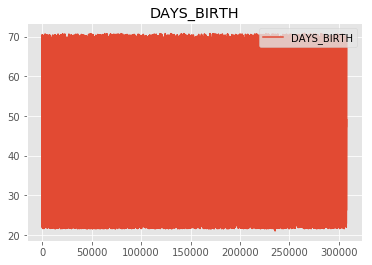

In [4]:

app_train.plot(y="DAYS_BIRTH", title = 'DAYS_BIRTH',use_index=True)
plt.show()
# from sklearn import preprocessing
# app_train['DAYS_BIRTH_SCALE'] = preprocessing.scale(app_train[['DAYS_BIRTH']])
# app_train.plot(y="DAYS_BIRTH_SCALE", title = 'DAYS_BIRTH_SCALE',use_index=True)
# plt.show()

# app_train['DAYS_BIRTH_SCALE'].head()

(35.986, 40.969]    41758
(40.969, 45.952]    40350
(31.003, 35.986]    38430
(45.952, 50.935]    34335
(50.935, 55.919]    33520
(26.02, 31.003]     33120
(55.919, 60.902]    32650
(60.902, 65.885]    27685
(20.987, 26.02]     13686
(65.885, 70.868]    11977
Name: DAYS_BIRTH_CUT, dtype: int64
group_sorted  [Interval(20.987, 26.02, closed='right'), Interval(26.02, 31.003, closed='right'), Interval(31.003, 35.986, closed='right'), Interval(35.986, 40.969, closed='right'), Interval(40.969, 45.952, closed='right'), Interval(45.952, 50.935, closed='right'), Interval(50.935, 55.919, closed='right'), Interval(55.919, 60.902, closed='right'), Interval(60.902, 65.885, closed='right'), Interval(65.885, 70.868, closed='right')]


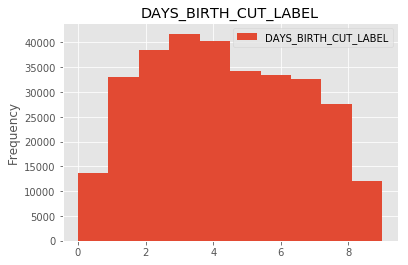

In [5]:
binNum = 10
app_train['DAYS_BIRTH_CUT'] = pd.cut(app_train['DAYS_BIRTH'], binNum)
print(app_train['DAYS_BIRTH_CUT'].value_counts())

group_sorted = list()
for group_name, group_data in app_train.groupby(['DAYS_BIRTH_CUT']):
    group_sorted.append(group_name)
    
print("group_sorted ", group_sorted)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(group_sorted)

app_train['DAYS_BIRTH_CUT_LABEL'] = le.transform(app_train['DAYS_BIRTH_CUT'])


app_train.plot(kind="hist",y="DAYS_BIRTH_CUT_LABEL", title = 'DAYS_BIRTH_CUT_LABEL',bins=binNum)
plt.show()



使用等量切割看看

(44.242, 48.371]                30764
(28.888, 32.848]                30760
(36.91, 40.494]                 30759
(53.048, 57.511]                30758
(57.511, 62.306]                30757
(21.035999999999998, 28.888]    30752
(40.494, 44.242]                30745
(32.848, 36.91]                 30745
(62.306, 70.868]                30738
(48.371, 53.048]                30733
Name: DAYS_BIRTH_QCUT, dtype: int64
group_sorted  [Interval(21.035999999999998, 28.888, closed='right'), Interval(28.888, 32.848, closed='right'), Interval(32.848, 36.91, closed='right'), Interval(36.91, 40.494, closed='right'), Interval(40.494, 44.242, closed='right'), Interval(44.242, 48.371, closed='right'), Interval(48.371, 53.048, closed='right'), Interval(53.048, 57.511, closed='right'), Interval(57.511, 62.306, closed='right'), Interval(62.306, 70.868, closed='right')]


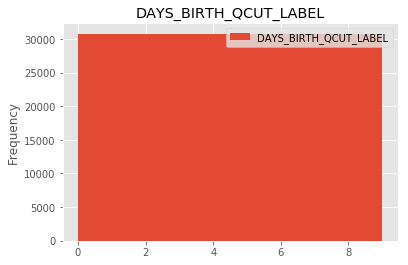

In [6]:
binNum = 10
app_train['DAYS_BIRTH_QCUT'] = pd.qcut(app_train['DAYS_BIRTH'], binNum)
print(app_train['DAYS_BIRTH_QCUT'].value_counts())

group_sorted = list()
for group_name, group_data in app_train.groupby(['DAYS_BIRTH_QCUT']):
    group_sorted.append(group_name)
    
print("group_sorted ", group_sorted)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(group_sorted)

app_train['DAYS_BIRTH_QCUT_LABEL'] = le.transform(app_train['DAYS_BIRTH_QCUT'])


app_train.plot(kind="hist",y="DAYS_BIRTH_QCUT_LABEL", title = 'DAYS_BIRTH_QCUT_LABEL',bins=binNum)
plt.show()



Text(0.5, 1.0, 'DAYS_BIRTH_CUT to TARGET bar plot')

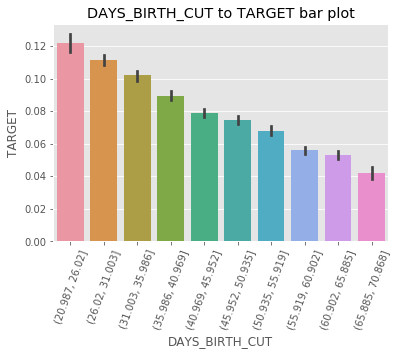

In [12]:

ax = sns.barplot(app_train['DAYS_BIRTH_CUT'],app_train['TARGET'])
plt.xticks(rotation=70)
ax.set_title('DAYS_BIRTH_CUT to TARGET bar plot')

Text(0.5, 1.0, 'DAYS_BIRTH_QCUT to TARGET bar plot')

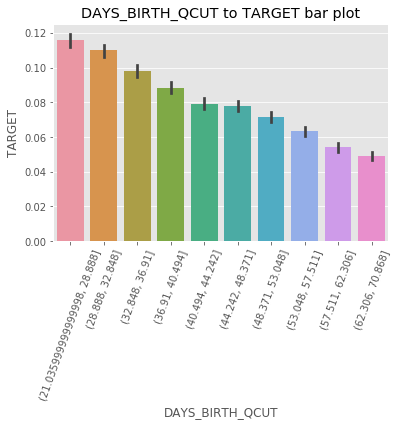

In [10]:

ax = sns.barplot(app_train['DAYS_BIRTH_QCUT'],app_train['TARGET'])
plt.xticks(rotation=70)
ax.set_title('DAYS_BIRTH_QCUT to TARGET bar plot')